In [139]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

In [140]:
df=pd.read_csv("train.csv")

In [141]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Describing the Data

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [143]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [144]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [145]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


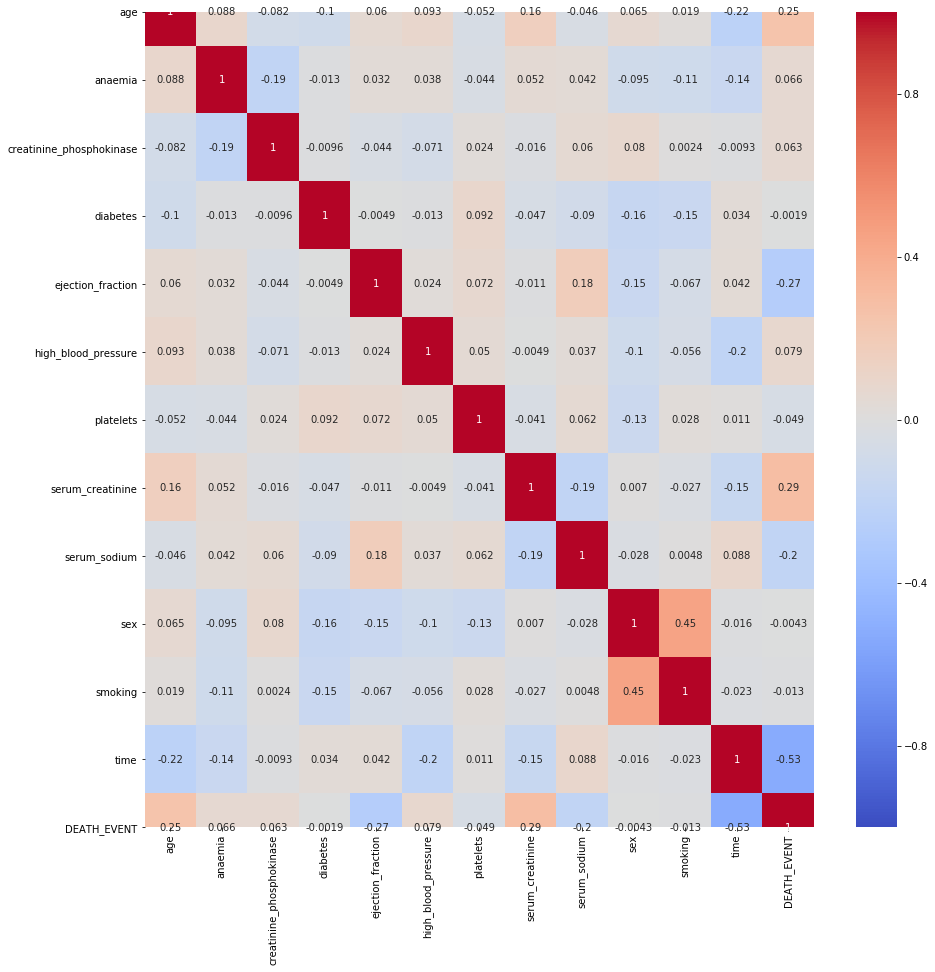

In [195]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm',vmin=-1)

In [147]:
df.corrwith(df["DEATH_EVENT"])

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
dtype: float64

In [203]:
x=df.iloc[:,0:12]

In [204]:
y=df['DEATH_EVENT']

In [205]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [206]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [207]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


# Spliting and Scaling the Data

In [233]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=.20)

In [234]:
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

## Basic ML Algos

In [235]:
rn=RandomForestClassifier()
rn.fit(x_train_scale,y_train)
rn.score(x_test_scale,y_test)

/Users/sahilsagar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8666666666666667

In [236]:
for i in range(2,11):
    kn=KNeighborsClassifier()
    kn.fit(x_train_scale,y_train)
    print(i,kn.score(x_test_scale,y_test))

2 0.8
3 0.8
4 0.8
5 0.8
6 0.8
7 0.8
8 0.8
9 0.8
10 0.8


In [237]:
lg=LogisticRegression()
lg.fit(x_train_scale,y_train)
lg.score(x_test_scale,y_test)

/Users/sahilsagar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8666666666666667

In [238]:
sv=SVC(kernel="poly")
sv.fit(x_train_scale,y_train)
sv.score(x_test_scale,y_test)

0.8333333333333334

In [239]:
sv=SVC()
sv.fit(x_train_scale,y_train)
sv.score(x_test_scale,y_test)

0.8333333333333334

In [240]:
sv=SVC(kernel="linear")
sv.fit(x_train_scale,y_train)
sv.score(x_test_scale,y_test)

0.8833333333333333

In [241]:
nv=BernoulliNB()
nv.fit(x_train_scale,y_train)
nv.score(x_test_scale,y_test)

0.8166666666666667

In [242]:
dt=DecisionTreeClassifier()
dt.fit(x_train_scale,y_train)
dt.score(x_test_scale,y_test)

0.8833333333333333

## Creating Neural Network

In [243]:
from keras.models import Sequential
from keras.layers import Dense

In [244]:
model=Sequential()
hidden1=Dense(units=32,activation='relu')
hidden2=Dense(units=56,activation='relu')
hidden3=Dense(units=26,activation='relu')
hidden4=Dense(units=46,activation='relu')
out=Dense(units=1,activation='sigmoid')
model.add(hidden1)
model.add(hidden2)
model.add(hidden3)
model.add(hidden4)
model.add(out)

In [245]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['accuracy'])

In [246]:
history=model.fit(np.asarray(x_train_scale),np.asarray(y_train),epochs=30, 
          validation_data=(np.asarray(x_test_scale),np.asarray(y_test)),shuffle=True)

Train on 239 samples, validate on 60 samples
Epoch 1/30
239/239 [==============================] - 1s 3ms/step - loss: 0.4720 - accuracy: 0.6444 - val_loss: 0.4411 - val_accuracy: 0.7167
Epoch 2/30
239/239 [==============================] - 0s 210us/step - loss: 0.4334 - accuracy: 0.6736 - val_loss: 0.3946 - val_accuracy: 0.7167
Epoch 3/30
239/239 [==============================] - 0s 270us/step - loss: 0.3931 - accuracy: 0.6695 - val_loss: 0.3482 - val_accuracy: 0.7167
Epoch 4/30
239/239 [==============================] - 0s 212us/step - loss: 0.3554 - accuracy: 0.6695 - val_loss: 0.3093 - val_accuracy: 0.7167
Epoch 5/30
239/239 [==============================] - 0s 199us/step - loss: 0.3274 - accuracy: 0.6695 - val_loss: 0.2848 - val_accuracy: 0.7333
Epoch 6/30
239/239 [==============================] - 0s 272us/step - loss: 0.3076 - accuracy: 0.6862 - val_loss: 0.2707 - val_accuracy: 0.7500
Epoch 7/30
239/239 [==============================] - 0s 134us/step - loss: 0.2891 - accuracy

In [247]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_61 (Dense)             (None, 56)                1848      
_________________________________________________________________
dense_62 (Dense)             (None, 26)                1482      
_________________________________________________________________
dense_63 (Dense)             (None, 46)                1242      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 47        
Total params: 5,035
Trainable params: 5,035
Non-trainable params: 0
_________________________________________________________________


In [258]:
model.evaluate(x_test_scale,y_test)[1]

60/60 [==============================] - 0s 109us/step


0.8166666626930237

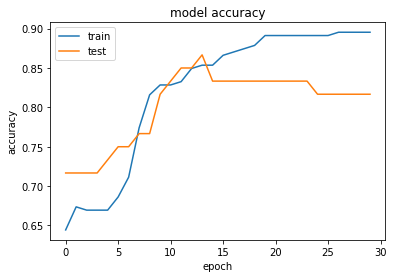

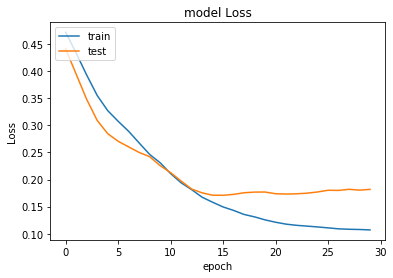

In [248]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Final Result

In [281]:
result={"Random Forest":rn.score(x_test_scale,y_test),
        "SVM-Linear-Kernel":sv.score(x_test_scale,y_test),
       "KNN":kn.score(x_test_scale,y_test),
       "Logistic Regression":lg.score(x_test_scale,y_test),
       "Decision Tree":dt.score(x_test_scale,y_test),
       "Neural Network":model.evaluate(x_test_scale,y_test)[1]}

60/60 [==============================] - 0s 236us/step


In [282]:
algo=list(result.keys())
value=list(result.values())

In [271]:
val=[]
for i in value:
    val.append(i*100)

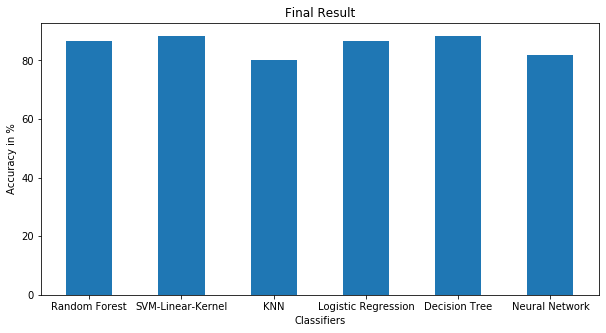

In [284]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(algo,val,width=.50)

plt.xlabel("Classifiers") 
plt.ylabel("Accuracy in %") 
plt.title("Final Result") 
plt.show() 